In [13]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [5]:
data_2d = pd.read_csv("data_2d.csv")
data_2d

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


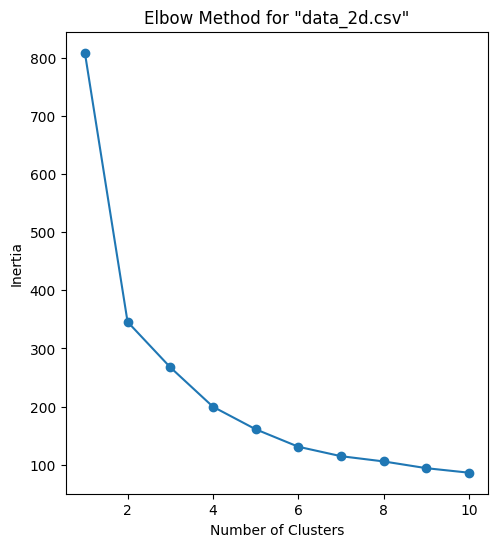

In [8]:
data_2d_values = np.array(data_2d.iloc[:, 1:])
inertia_2d = []
for i in range(1, 11):
    kmeans_2d = KMeans(n_clusters=i,init="k-means++",max_iter=100,n_init="auto",random_state=42)
    kmeans_2d.fit(data_2d_values)
    inertia_2d.append(kmeans_2d.inertia_)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia_2d, marker='o')
plt.title('Elbow Method for "data_2d.csv"')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\admin\AppData\Local\pypoetry\Cache\virtualenvs\dz-6-cEn5nDiy-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


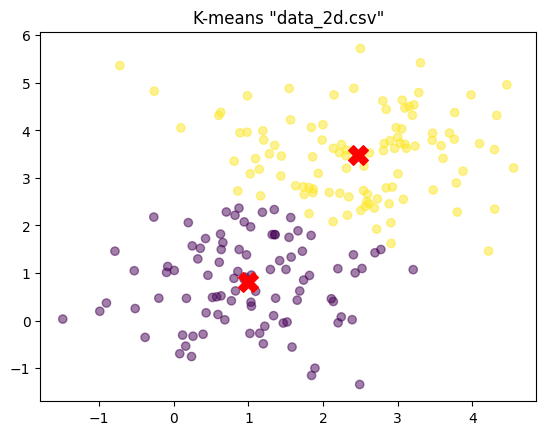

In [20]:
kmeans_2d = KMeans(n_clusters=2, random_state=42) 
kmeans_2d.fit(data_2d_values)
labels_2d = kmeans_2d.labels_
centers_2d = kmeans_2d.cluster_centers_
plt.scatter(data_2d_values[:, 0], data_2d_values[:, 1], c=labels_2d, cmap='viridis', alpha=0.5)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', marker='X', s=200)
plt.title('K-means "data_2d.csv"')
plt.show()

In [12]:
mnist = pd.read_csv("mnist.csv")
mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
pca = PCA(n_components=2)
pca_mnist = pca.fit_transform(mnist.iloc[:, 1:])

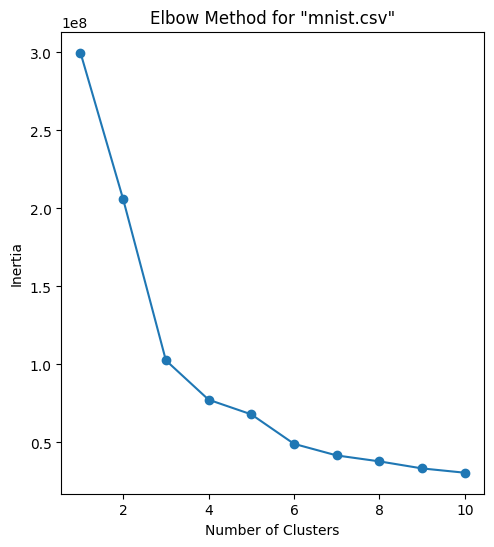

In [16]:
inertia_mnist = []
for i in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=i,init="k-means++",max_iter=100,n_init="auto",random_state=42)
    kmeans_mnist.fit(pca_mnist)
    inertia_mnist.append(kmeans_mnist.inertia_)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), inertia_mnist, marker='o')
plt.title('Elbow Method for "mnist.csv"')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\admin\AppData\Local\pypoetry\Cache\virtualenvs\dz-6-cEn5nDiy-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


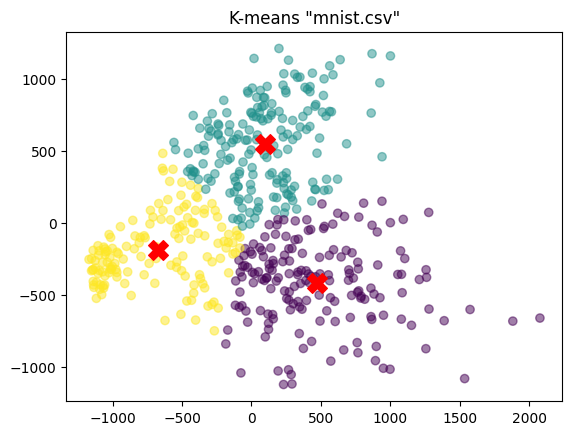

In [19]:
kmeans_mnist = KMeans(n_clusters=3, random_state=42) 
kmeans_mnist.fit(pca_mnist)
labels_mnist = kmeans_mnist.labels_
centers_mnist = kmeans_mnist.cluster_centers_
plt.scatter(pca_mnist[:, 0], pca_mnist[:, 1], c=labels_mnist, cmap='viridis', alpha=0.5)
plt.scatter(centers_mnist[:, 0], centers_mnist[:, 1], c='red', marker='X', s=200)
plt.title('K-means "mnist.csv"')
plt.show()